# The Titanic Data Set

Next, we will use one of the most famous data sets to begin to learn about exploratory data analysis and visualization. First, we define the task in terms of a well-defined problem statement.

**Domain** This is an introductory data set considered the "hello world" of data science. It is an ongoing competition on [Kaggle](https://www.kaggle.com/c/titanic) allowing students of data science to prepare a model and make a submission to a competition while they are still learning the subject. 

**Problem** This is a binary classification problem in which the challenge is to predict whether a passenger survived the sinking of the Titanic given the demographic data of the passengers. Here, the task $T$ is a binary classification and the experience $E$ is the list of passengers and their survival outcome. The machine learning challenge is to learn to perform this task using this experience.

**Solution** To solve this problem, we will programmatically generate a vector of integers using filtering and masking. This could be thought of as a kind of proto-decision tree.

**Data** A preliminary analysis of the data shows the following:

- there are 891 rows and 10 useful variable columns in the dataset. One of these columns is the target `Survived`. An 11th and 12th column are a unique id for each passenger and the name of each passenger, respectively, and have no predictive power.
- there are four integer value columns:
   - `Survived`
   - `Pclass`
   - `SibSp`
   - `Parch`
- there are two numerical value columns:
   - `Age`
   - `Fare`
- there are five factor columns:
   - `Sex`
   - `Ticket`
   - `Cabin`
   - `Embarked`
- The following are the summary statistics of the data:

   ```
      Survived   |   Pclass    |   Sex      |    Age      |     SibSp   |    Parch     |       Fare         
    Min. :0.0000 | Min. :1.000 | female:314 | Min. : 0.42 | Min. :0.000 | Min. :0.0000 | Min. :  0.00 
    Mean :0.3838 | Mean :2.309 | male  :577 | Mean :29.70 | Mean :0.523 | Mean :0.3816 | Mean : 32.20 
    Max. :1.0000 | Max. :3.000 |            | Max. :80.00 | Max. :8.000 | Max. :6.0000 | Max. :512.33 
                 |             |            | NA's   :177 |  
   ```                     

**Benchmark** We will use a naive guess based on the most common class as a benchmark. 61.6% of passengers did not survive. We will guess for our benchmark that there were no survivors.

**Metrics** As this is an beginning exercise, we will use the accuracy.

## Measuring Accuracy

We have written two functions here to help us to measure the accuracy of a prediction vector. The first function is called `verify_length`. It takes two vectors and compares their length to make sure that they have the same length. This function is used in the second function as a preliminary check. If a prediction vector does not have the same length as a vector of actual values then there is a deeper problem that must be dealt with.

The second function is the `accuracy` function. This function takes two vectors: 1) a vector of actual values and 2) a vector of predicted values and compares them. It assigns a value of `TRUE` to each value that the prediction gets correct. Finally, all of the `TRUE` values are counted and this is divided by the length of the vector of actual values.

#### define accuracy metric

In [1]:
verify_length <- function (v1, v2 ){
    if (length(v1) != length(v2)) {
        stop('length of vectors do not match') 
    }
}

accuracy <- function (actual, predicted) {
    verify_length(actual, predicted)
    return(sum(actual == predicted)/length(actual))
}

For example we might have the following vector of the actual values:

#### a simple vector of actual values

In [2]:
actual = c(1,1,0,0,1)

Our model might generate the following vector of predicted values:

#### a simple vector of predictions

In [3]:
predicted = c(1,1,1,0,0)

For this simple result, we can look at it and tell that the predictions get 3 right and 2 wrong for an accuracy of 0.6.

#### assess accuracy of predictions

In [4]:
accuracy(actual, predicted)

[1] 0.6

## Preliminary Analysis

We will start with some preliminary analysis on our data set.

### Load the dataset using R

First, we love the data set using the R function `read.csv` and assign it to the variable `titanic`. Note that the `read.table` and `read.csv` in R are equivalent accept for the default args. `read.table` defaults to separating on white space. `read.csv` defaults to separating on commas. `read.csv` also defaults to the argument `header=T`.

#### load the dataset using `read.csv()`

In [5]:
titanic <- read.csv('data/titanic.csv')

In [6]:
stopifnot(dim(titanic) == c(891,12))

We displayed the dimension `dim()` and the structure `str()` of our datafrane. This is mostly done as a sanity check. We should have some idea of what the dimension and structure of our data is. By displaying these results immediately after loading the data, we can verify that the data has been loaded as we expect.

#### display the dimension of the data set

In [7]:
dim(titanic)

[1] 891  12

#### display the structure of the dataframe

In [8]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### The `R` Structure Object

I interpret the structure of our data frame in the following way. Each row in the structure object, `str(titanic)` represents a column in the data frame `titanic`. The value immediately following the `$` is the name of that column. The value immediately following the `:` is the data type of that column. The values following the datatype are the first few values of the data in the column itself. 

Note that R has made some default decisions about the structure of our data. It has designated five columns as integer columns, five columns as factor columns, and two columns as numerical problems. These may or may not be accurate according to our own understanding of the data. This was done by R, doing its best to intuit the structure of the data during the read of the CSV file. For example, a reasonable case could be made that the the `Survived` column should not be an integer, nor should the `Pclass`.

### Categorical Features In R 

R stores categorical features using a special type of vector called a **factor**. The data is stored as a vector of integers. The factor has an additional attribute, however. It also has a vector of levels. The integer stored as data are actually references to the vector of names. We can think of the data stored in the Factor as a mapping to the vector of levels.

#### display that class of the `titanic$embarked` column

In [9]:
class(titanic$Embarked)

[1] "factor"

#### display that levels of the `titanic$embarked` column

In [10]:
levels(titanic$Embarked)

[1] ""  "C" "Q" "S"

#### display that first few values of the `titanic$embarked` column

In [11]:
titanic$Embarked[1:5]

[1] S C S S S
Levels:  C Q S

### Completely Unique Columns

We can see from the structure of our data frame that it contains two columns that are completely unique. We are attempting to use the patterns in our data to make predictions about the survival of passengers during the Titanic disaster. This is done by identifying patterns in the data. If they column is completely unique there is no pattern to be identified there. Each passenger has its own unique value and there is really no immediate way to associate these unique values with each other. For this reason we will simply remove the completely unique columns. Prior to doing this, however, we should verify that they are in fact completely.

The two columns in question are `PassengerId` and `Name`. We will use the following method to establish that they are both completely unique:

1. We will take a measure of the number of passengers in the data set
2. We will take a measure of the number of unique values in each of the columns in question
3. If the values match we will consider the column safe for removal

#### store the number of passengers

In [12]:
number_of_passengers = length(titanic$PassengerId)
number_of_passengers

[1] 891

#### display the length of the unique values in `titanic$passengerid` and `titanic$name` 

In [13]:
length(unique(titanic$PassengerId)); length(unique(titanic$Name))

[1] 891

[1] 891

We note that the values do indeed match, therefore, it is safe to drop both of these columns from our dataframe. This can be done by assigning the `NULL` value to the named column. For example, we might do the following on a generic data frame and column

    dataframe$mycolumn = NULL

#### drop the columns with completely unique values

In [14]:
titanic$PassengerId <- NULL
titanic$Name <- NULL

In [15]:
stopifnot(is.null(titanic$PassengerID))
stopifnot(is.null(titanic$Name))
stopifnot(as.vector(titanic[4,]) == c('1','1','female', '35', '1','0','113803','53.1','C123','S'))

### Summarize The Data

Finally, having dropped the features deemed not immediately useful, we display the summary statistics of the dataframe using the `summary()` function. This function shows the quartile values of the data as well as mean and median for numerical features and the counts to the best of its ability for the factors.

In [16]:
summary(titanic)

    Survived          Pclass          Sex           Age            SibSp      
 Min.   :0.0000   Min.   :1.000   female:314   Min.   : 0.42   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:2.000   male  :577   1st Qu.:20.12   1st Qu.:0.000  
 Median :0.0000   Median :3.000                Median :28.00   Median :0.000  
 Mean   :0.3838   Mean   :2.309                Mean   :29.70   Mean   :0.523  
 3rd Qu.:1.0000   3rd Qu.:3.000                3rd Qu.:38.00   3rd Qu.:1.000  
 Max.   :1.0000   Max.   :3.000                Max.   :80.00   Max.   :8.000  
                                               NA's   :177                    
     Parch             Ticket         Fare                Cabin     Embarked
 Min.   :0.0000   1601    :  7   Min.   :  0.00              :687    :  2   
 1st Qu.:0.0000   347082  :  7   1st Qu.:  7.91   B96 B98    :  4   C:168   
 Median :0.0000   CA. 2343:  7   Median : 14.45   C23 C25 C27:  4   Q: 77   
 Mean   :0.3816   3101295 :  6   Mean   : 32.20   G6        

## Preparing A Benchmark Model

Having performed a preliminary analysis of the data, we move onto preparing a benchmark model. First, we will do some analysis of the target column. Based upon this analysis we will think about what the best model for a benchmark might be. 

We will make use of the R `table()` function to study the target column. This function builds a contingency table of the counts combinations of factor levels. Of course if only a Single column is passed to the function, it will just return a simple count.

#### display a contingency table of `titanic$survived`

In [17]:
table(titanic$Survived)


  0   1 
549 342 

From the result returns, we can see that the  survival status is stored As either is 0, corresponding to did not survive, or a 1 corresponding to survived. We can use the helper function `prop.table()` to express the results a contingency table as fractions. Here, we can see that $0.\bar{61}$ Of the passengers did not survive. One thing we should immediately take note of is that our target column is not evenly distributed. An **evenly distributed** target column would have the exact same number of each possible outcome. As we grow in our data science practice we will learn more about dealing with an evenly distributed target. For now it is sufficient to simply take note of this fact.

#### display a proportion table of `titanic$survived`

In [18]:
prop.table(table(titanic$Survived))


        0         1 
0.6161616 0.3838384 

Below, we use a histogram to show once more that the target is not evenly distributed. By default, the `hist()` function simply shows the counts for each measured value.

#### display a histogram of `titanic$Survived`

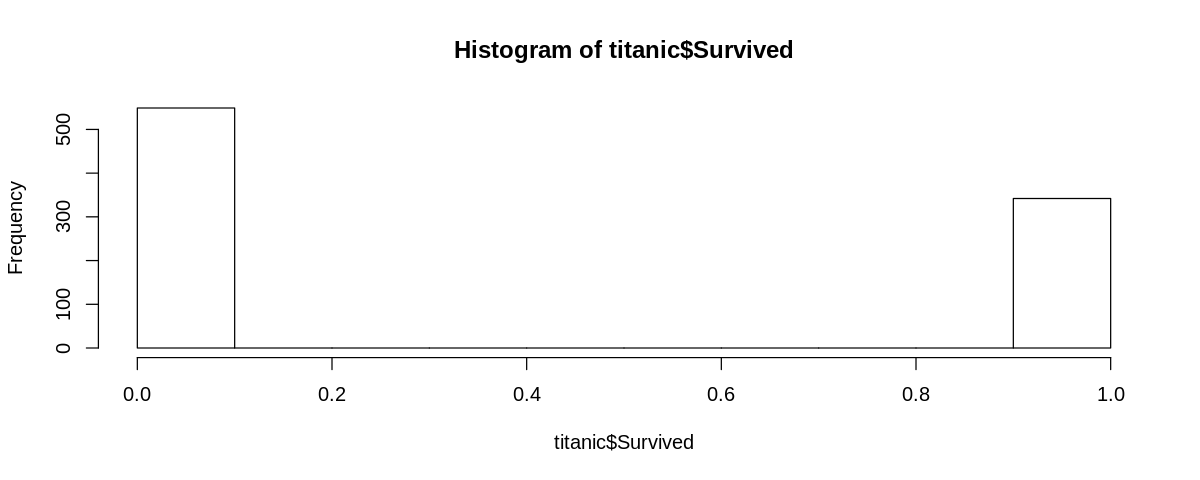

In [19]:
library(repr)
options(repr.plot.width=10, repr.plot.height=4)

hist(titanic$Survived)

### A Naïve Guess

We will use a naive guess based on the most common class as a benchmark. 61.6% of passengers did not survive. We will guess for our benchmark that there were no survivors. Note that we have done very little work and already have a better then 50-50 chance I've getting a correct answer simply by guessing that no one survived. This is one consideration for having an unevenly distributed target. Simply measuring accuracy may not give us a realistic sense of how well our model is doing. This is one reason why preparing a benchmark is so important. Had we not prepared at benchmark we might think that a 55% accuracy is deceny because it's better than the simple 50-50. This benchmark gives us a sense of what we need to do better than in order to prepare a model that adds value to the situation.

#### Create a vector called `no_survivors` that is a list of predictions that no one survived.

To create such a vector using R, we will use the replicate `rep()` function. This function takes a value and replicates it a given number of times.

In [20]:
no_survivors <- rep(0, number_of_passengers)

In [21]:
stopifnot(no_survivors == rep(0, length(titanic$Survived)))

Once we have prepared this naïve guess, we can use the `accuracy` function we defined earlier to assess our benchmark as a vector of predictions.

#### accuracy of our naïve prediction

In [22]:
accuracy(titanic$Survived, no_survivors)

[1] 0.6161616

As expected, we achieve an accuracy of $0.\bar{61}$.

## A Vectorized Solution To `fizzbuzz`

`fizzbuzz` is a canonical "coding interview" problem. You might want to read this humorous take by Joel Grus who attempts to use tensor for to solve the problem: http://joelgrus.com/2016/05/23/fizz-buzz-in-tensorflow/. The challenge is to iterate over the numbers from 1 to 100, printing "fizz" if the number is divisible by 3, "buzz" if the number is divisible by 5, "fizzbuzz" if the number is divisible by 15, and the number itself otherwise. Typically this problem is solved using for-loops and if-else statements and is used as a basic assessment of programming ability. Such a solution might look like this

#### a first attempt at `fizzbuzz`

In [23]:
fizzbuzz = function (n) {
    for (i in 1:n) {
        if (i %% 15 == 0) print("fizzbuzz")
        else if (i %% 3 == 0) print("fizz")
        else if (i %% 5 == 0) print("buzz")
        else print(i)
    }
}
fizzbuzz(15)

[1] 1
[1] 2
[1] "fizz"
[1] 4
[1] "buzz"
[1] "fizz"
[1] 7
[1] 8
[1] "fizz"
[1] "buzz"
[1] 11
[1] "fizz"
[1] 13
[1] 14
[1] "fizzbuzz"


It may be a bit much to come up with a solution to this problem using tensorflow. It is, however, very useful to think about solving this problem using masks and filters. Suppose we begin with a simple solution vector as follows

#### start the `solution` vector

In [24]:
solution = 1:15
solution

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

The challenge is to replace the values we don't need with the correct strings. Sure we can iterate over this list check the value to see if it's divisible by three or five but using a vectorized solution we can do it all at once.

The Steps to doing this are as follows:
 
1. Create a mask for a certain condition we might wish to check
1. Use that mask to restrict the values of the original `solution` we are looking at
1. Replace to values of the restricted vector with the appropriate string

First, we create a mask called `mod15_mask`. Note, that when we display it there is only a single `TRUE` value, in the position where the value is divisible by 15 (and in this case is actually 15).

#### create the mod 15 mask

In [25]:
mod15_mask = (solution %% 15 == 0)
mod15_mask

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE  TRUE

Next, we filter the `solution` using the `mod15_mask`.

#### filter `solution` using the mind 15 mask

In [26]:
solution[mod15_mask]

[1] 15

Finally, we assign the filtered values the string `"fizzbuzz"`

#### assign valued to the filtered `solution` vector

In [27]:
solution[mod15_mask] = "fizzbuzz"

Let's have a look at the current value of our solution.

In [28]:
solution

[1] "1"        "2"        "3"        "4"        "5"        "6"       
 [7] "7"        "8"        "9"        "10"       "11"       "12"      
[13] "13"       "14"       "fizzbuzz"

We can repeat this technique to build an entire solution to the problem.

#### a vectorized `fizzbuzz`

In [29]:
fizzbuzz = function (n) {
    solution = 1:n
    mod3_mask = (solution %% 3 == 0)
    mod5_mask = (solution %% 5 == 0)
    mod15_mask = (solution %% 15 == 0)
    
    solution[mod3_mask] = "fizz"
    solution[mod5_mask] = "buzz"
    solution[mod15_mask] = "fizzbuzz"
    
    cat(solution,sep="\n")
}

fizzbuzz(15)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


In terms of the why of doing a vectorized approach, there are tremendous speed gains to be had implementing your algorithms using vectors rather than loops. To read more about this, have a look at this blog post: http://www.noamross.net/blog/2014/4/16/vectorization-in-r--why.html

## Incremental Model Improvement With Filters And Masks

And now begins the work of data scientist. We have established a benchmark model. We should now begin to refine upon this model seeking to continually improve the benchmark performance that we have. We can do this by using exploratory data analysis to study the features, especially as they relate to the target. If we find a feature that we believe exhibits some pattern of correspondence to our target we can use this to refine our model.

For this project, we are going to think of our model as simply the values stored in a vector of predictions. For example, we already have one model, a model called `no_survivors`, which is simply a vector of zeros. To improve upon this model we will use a mask to reduce the number of values we are looking at and then replace these values with a 1. 

What if we try to improve our model by simply randomly replacing zeros with one? We can do this using the `sample()` function

### Randomized Model Improvement

#### create a random mask

In [30]:
random_mask = sample(c(TRUE,FALSE), number_of_passengers, replace = TRUE)
random_mask[1:10]

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE

#### duplicate and filter to create random model

In [31]:
random_model = rep(no_survivors)
random_model[random_mask] = 1

#### assess accuracy of random model

In [32]:
accuracy(titanic$Survived, random_model)

[1] 0.5050505

As suspected, simply guessing is not better than guessing all zeros. It looks like we might actually justify our exorbitant salaries after all.

#### Use Proportion Tables To Look At Survival By Feature

Previously, we use a proportion table to look at a single feature, `Survived`. Next, We will use a proportion table to look at how two features interact with each other. Let's look at the structure of the dataframe again to remind ourselves which features we have available to us.

#### display the structure of the dataframe

In [33]:
str(titanic)

'data.frame':	891 obs. of  10 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket  : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin   : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


First, we look at the proportions of `Pclass` and `Survived`. There are three different ways we can look at a proportion table. 

1. The values of each combination as a proportion of the whole
1. The values in each row as a proportion of that row
1. The values in each column as a proportion of that column

#### whole proportions of `Pclass` versus `Survived`

In [34]:
prop.table(table(titanic$Pclass, titanic$Survived))

   
             0          1
  1 0.08978676 0.15263749
  2 0.10886644 0.09764310
  3 0.41750842 0.13355780

#### proportions of `Pclass` versus `Survived` by row

In [35]:
prop.table(table(titanic$Pclass, titanic$Survived), 1)

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

####  proportions of `Pclass` versus `Survived` by column 

In [36]:
prop.table(table(titanic$Pclass, titanic$Survived), 2)

   
            0         1
  1 0.1457195 0.3976608
  2 0.1766849 0.2543860
  3 0.6775956 0.3479532

#### whole proportions of `Sex` versus `Survived`

In [37]:
prop.table(table(titanic$Sex, titanic$Survived))

        
                  0          1
  female 0.09090909 0.26150393
  male   0.52525253 0.12233446

#### proportions of `Sex` versus `Survived` by row

In [38]:
prop.table(table(titanic$Sex, titanic$Survived), 1)

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

####  proportions of `Sex` versus `Survived` by column 

In [39]:
prop.table(table(titanic$Sex, titanic$Survived), 2)

        
                 0         1
  female 0.1475410 0.6812865
  male   0.8524590 0.3187135

#### Analyze Proportion Tables

Using the results obtained about prepare an analysis ofhHow these two features can be used to predict whether or not someone survived the sinking of the Titanic.

### Targeted Model Improvement

We saw that randomly selecting values to be replaced by one did not improve our model. What if we use some more intelligent way to select values that should be replaced by a one in our vector of predictions? We just looked at two features and identified some patterns that showed it would be more likely to have survived the sinking of the ship. Based upon this work we might decide that it would be a better model to replace the prediction for all female passengers with a 1. We can do that using masks and filters.

#### create a mask of just women

In [40]:
women_mask = titanic$Sex == 'female'
women_mask[1:10]

[1] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE

#### duplicate and filter to create a model, `women_survived`

In [41]:
women_survived = rep(no_survivors)
women_survived[women_mask] = 1

#### assess accuracy of  model, `women_survived`

In [42]:
accuracy(titanic$Survived, women_survived)

[1] 0.7867565

#### Explaining Creation Of Prediction Vector 

Explain in your own words the process by which the prediction vector, `women_survived`:

### Can Another Feature Help?

In [43]:
prop.table(table(titanic$Survived, titanic$Pclass, titanic$Sex))

, ,  = female

   
              1           2           3
  0 0.003367003 0.006734007 0.080808081
  1 0.102132435 0.078563412 0.080808081

, ,  = male

   
              1           2           3
  0 0.086419753 0.102132435 0.336700337
  1 0.050505051 0.019079686 0.052749719


#### create a mask of just first class

In [44]:
first_class_mask = titanic$Pclass == 1
first_class_mask[1:10]

[1] FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE

#### duplicate and filter to create a model, `women_and_first_class_survived`

In [45]:
women_and_first_class_survived = rep(women_survived)
women_and_first_class_survived[first_class_mask] = 1

#### assess accuracy of  model, `women_and_first_class_survived`

In [46]:
accuracy(titanic$Survived, women_and_first_class_survived)

[1] 0.7508418

In [47]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived))

#### Progress Report

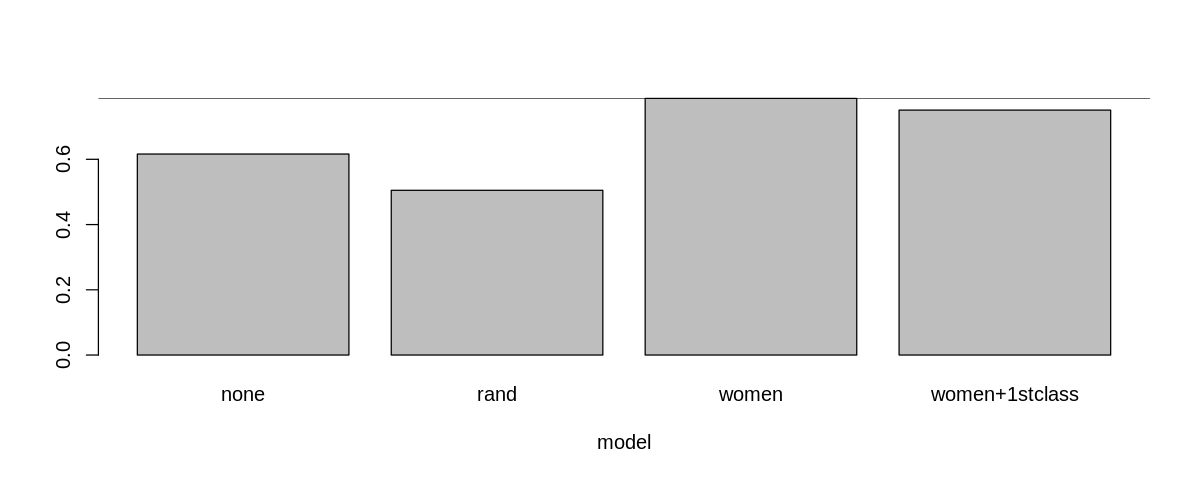

In [48]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass'))
abline(h = max(scores))

## Numerical Features as Categorical Features

Age is a numerical feature.

Age has missing values.

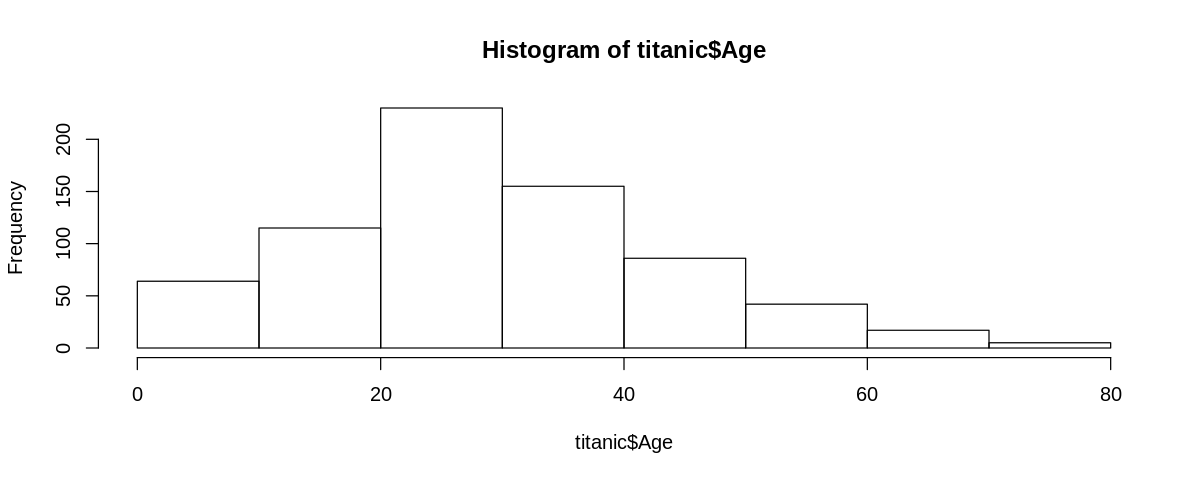

In [49]:
hist(titanic$Age)

In [50]:
missing_age_values_mask = is.na(titanic$Age)

In [51]:
head(titanic$Survived[missing_age_values_mask])

[1] 0 1 1 0 1 0

In [52]:
survived_mask = as.logical(titanic$Survived)

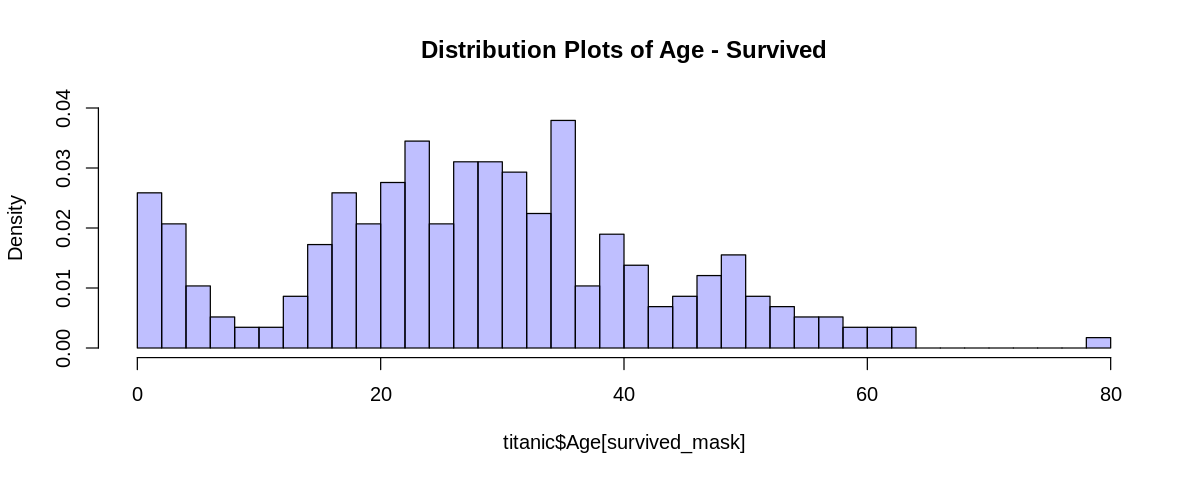

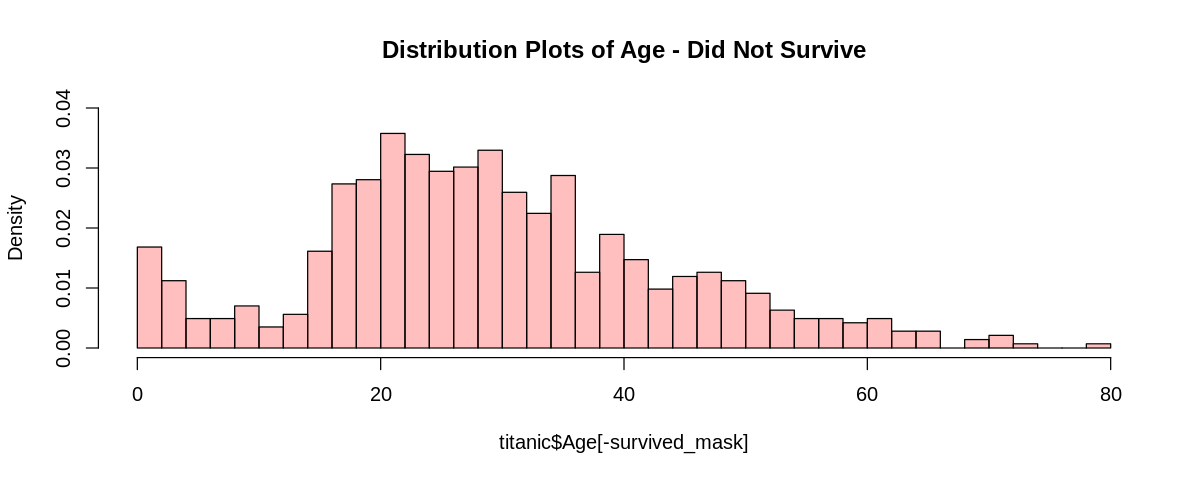

In [53]:
h1 = hist(titanic$Age[survived_mask], col=rgb(0,0,1,1/4), 
          freq = F, breaks = 30, ylim = c(0,0.04),
          main='Distribution Plots of Age - Survived')
h2 = hist(titanic$Age[-survived_mask], col=rgb(1,0,0,1/4), 
          freq = F, breaks = 30, ylim = c(0,0.04),
          main = 'Distribution Plots of Age - Did Not Survive')


#### create a mask of just children

In [54]:
children_mask = titanic$Age < 10

#### duplicate and filter to create a model, `women_survived`

In [55]:
women_and_children_survived = rep(women_survived)
women_and_children_survived[children_mask] = 1

#### assess accuracy of  model, `women_survived`

In [56]:
accuracy(titanic$Survived, women_and_children_survived)

[1] 0.7934905

In [57]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived),
           accuracy(titanic$Survived, women_and_children_survived))

#### Progress Report

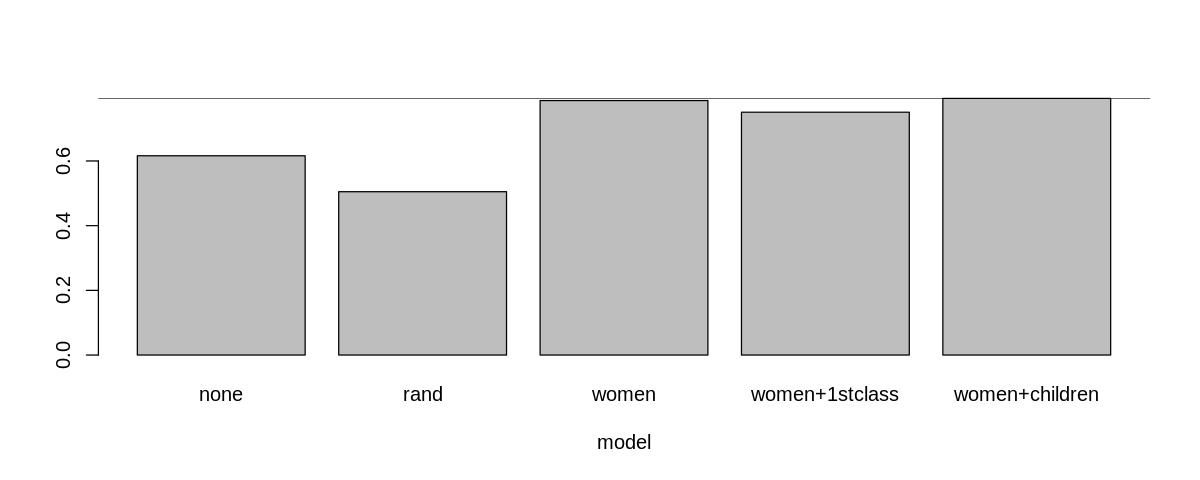

In [58]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass', 'women+children'))
abline(h = max(scores))

In [59]:
child_survival_by_age = function (age) {
    children_mask = titanic$Age < age

    women_and_children_survived = rep(women_survived)
    women_and_children_survived[children_mask] = 1

    return(accuracy(titanic$Survived, women_and_children_survived))
}


In [60]:
ages = 1:20

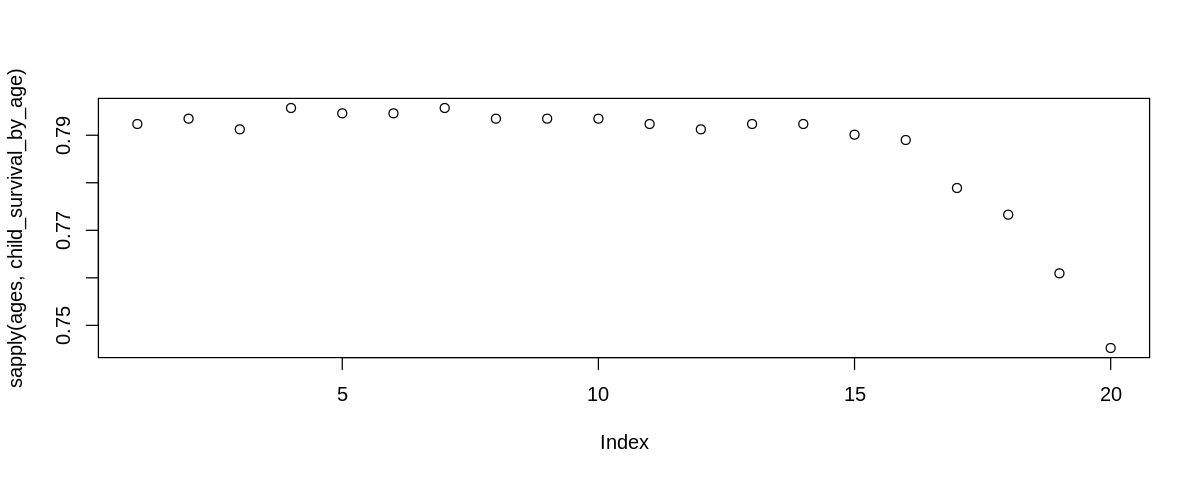

In [61]:
plot(sapply(ages, child_survival_by_age))

#### create a mask of just children

In [62]:
children_mask = titanic$Age < 7

#### duplicate and filter to create a model, `women_survived`

In [63]:
women_and_children_survived = rep(women_survived)
women_and_children_survived[children_mask] = 1

#### assess accuracy of  model, `women_survived`

In [64]:
accuracy(titanic$Survived, women_and_children_survived)

[1] 0.7957351

In [65]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived),
           accuracy(titanic$Survived, women_and_children_survived))

#### Progress Report

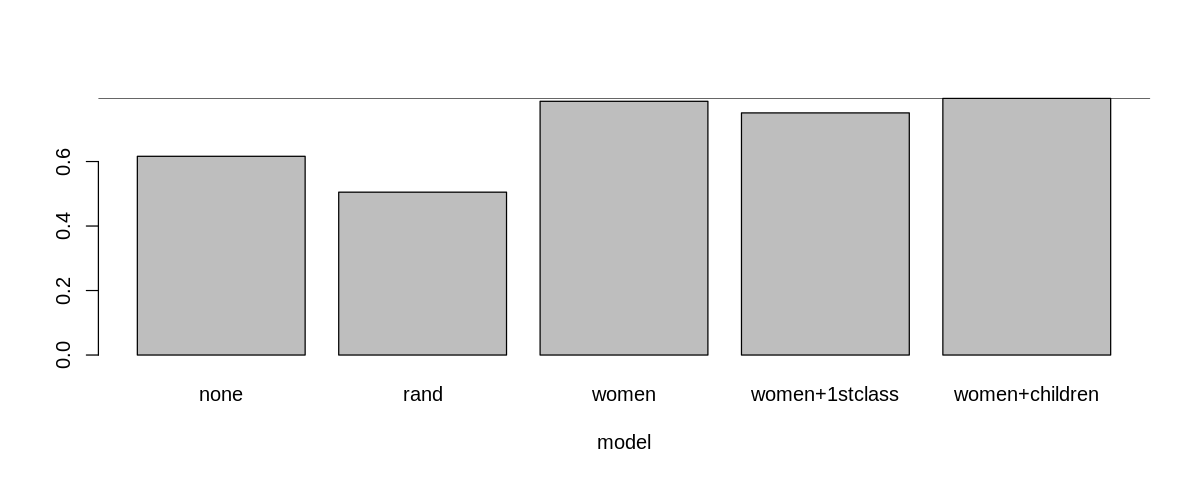

In [66]:
barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass', 'women+children'))
abline(h = max(scores))